Loading generator model...
Processing single image...
1/1 [==============================] - 0s 218ms/step
Applying edge-aware sharpening...


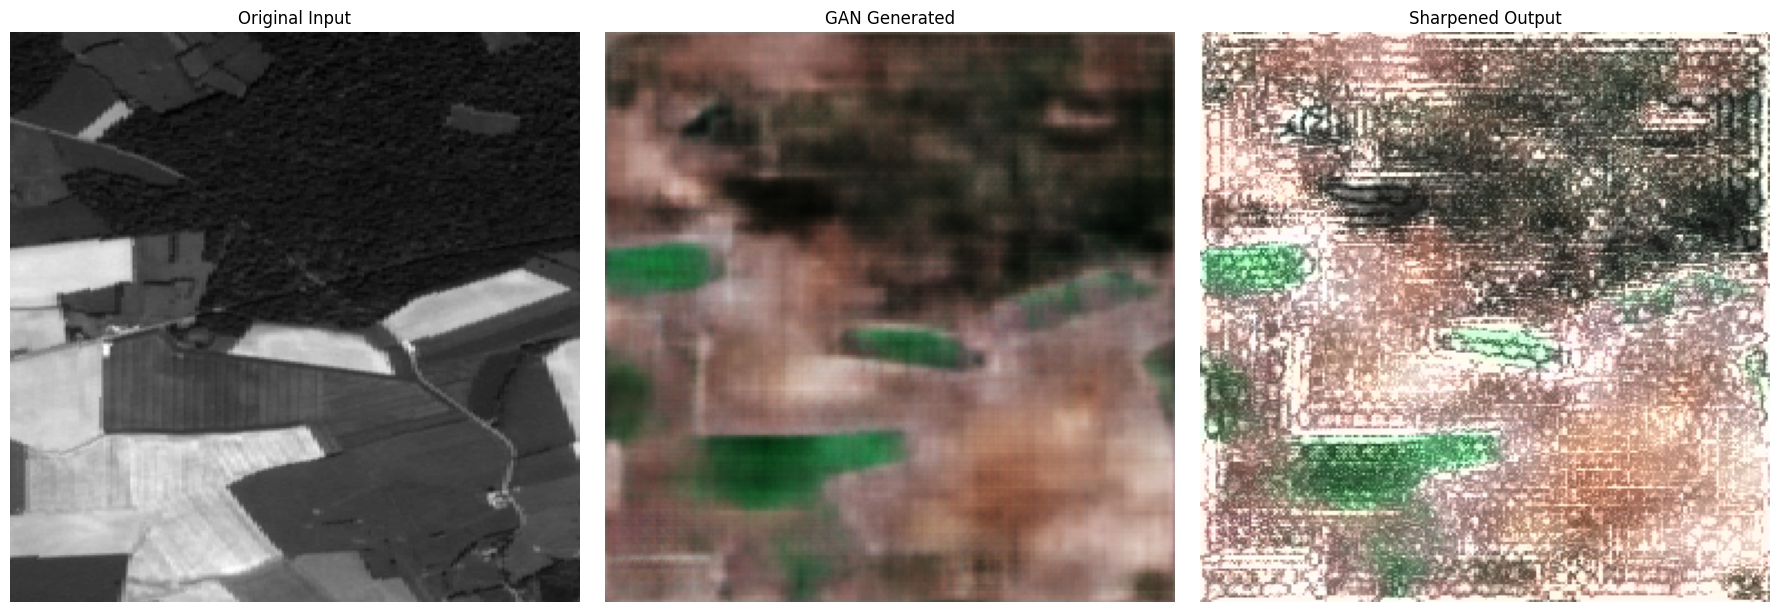

Prediction completed! Results saved to: C:\Users\lenovo\Desktop\DTI Project\outputs


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras import layers

def load_generator(model_path, input_channels=1, output_channels=3):
    """Load a trained generator model"""
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path, target_size=(256, 256)):
    """Load and preprocess an image for prediction"""
    img = Image.open(image_path).convert('L')  # Ensure grayscale input
    img = img.resize(target_size)
    img_array = np.array(img) / 127.5 - 1.0  # Normalize to [-1,1]
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

def postprocess_image(prediction):
    """Convert model output (-1 to 1) to displayable image (0-255)"""
    img_array = ((prediction[0] + 1) * 127.5).astype(np.uint8)
    return np.clip(img_array, 0, 255)

def predict_and_save(generator, input_path, output_path):
    """Make prediction and save result"""
    input_image = preprocess_image(input_path)
    prediction = generator.predict(input_image)
    output_image = postprocess_image(prediction)
    Image.fromarray(output_image).save(output_path)
    return output_image

def visualize_comparison(input_path, output_path):
    """Display input and output side by side"""
    input_img = Image.open(input_path)
    output_img = Image.open(output_path)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Input Image")
    plt.imshow(input_img, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title("Generated Image")
    plt.imshow(output_img)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example Usage
if __name__ == "__main__":
    MODEL_PATH = r"C:\Users\lenovo\Desktop\DTI Project\generator_epoch_150.h5"
    INPUT_IMAGE = r"D:\gan model\agri\s1\ROIs1868_summer_s1_59_p2.png"
    OUTPUT_IMAGE = r"C:\Users\lenovo\Desktop\DTI Project\outputs\result_2.png"
    
    print("Loading generator model...")
    generator = load_generator(MODEL_PATH)
    
    print("Processing single image...")
    predict_and_save(generator, INPUT_IMAGE, OUTPUT_IMAGE)
    visualize_comparison(INPUT_IMAGE, OUTPUT_IMAGE)
    
    print("Prediction completed! Result saved to:", OUTPUT_IMAGE)